In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [3]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
#drop unnamed column, year and month
df_index.drop(columns = ['Unnamed: 0','year','month'],axis=1,inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

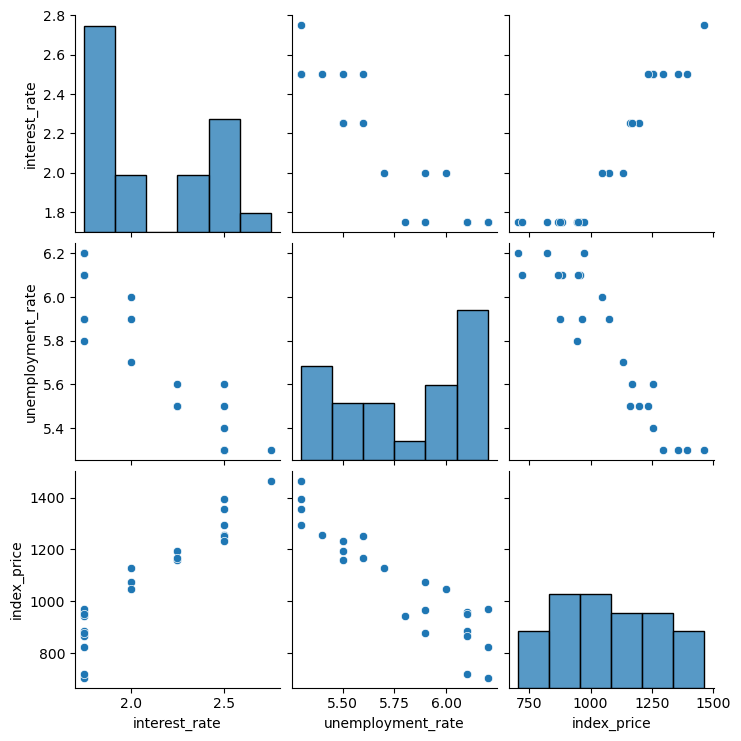

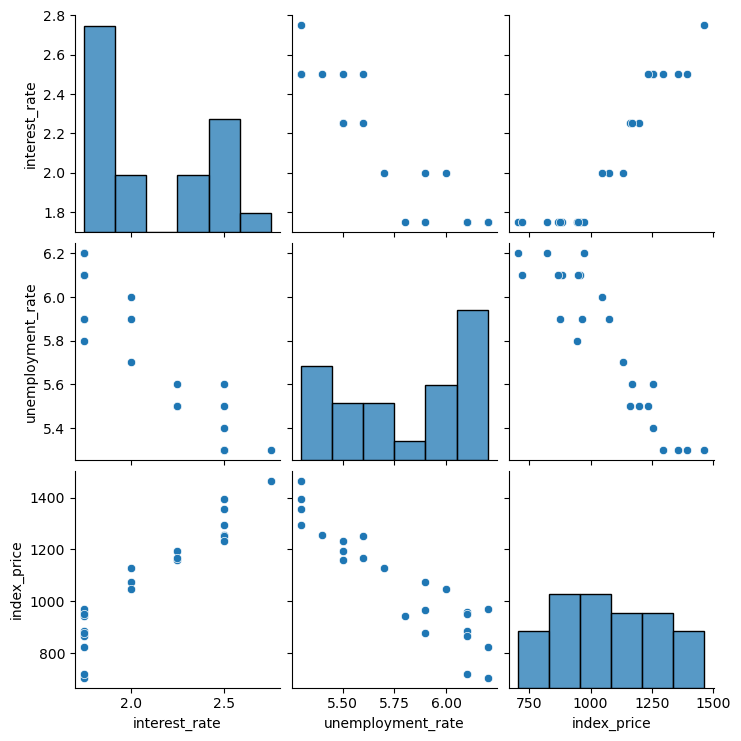

In [12]:
sns.pairplot(df_index)
plt.show()

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


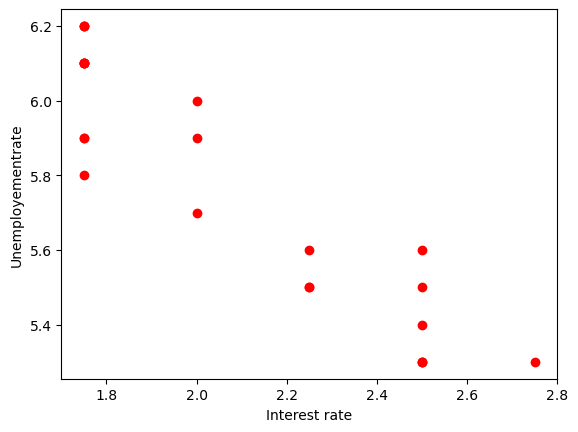

In [21]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployementrate')
plt.show()

In [22]:
#x and y variables
X = df_index.iloc[:,:-1]
Y=df_index.iloc[:,-1]

In [24]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [25]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

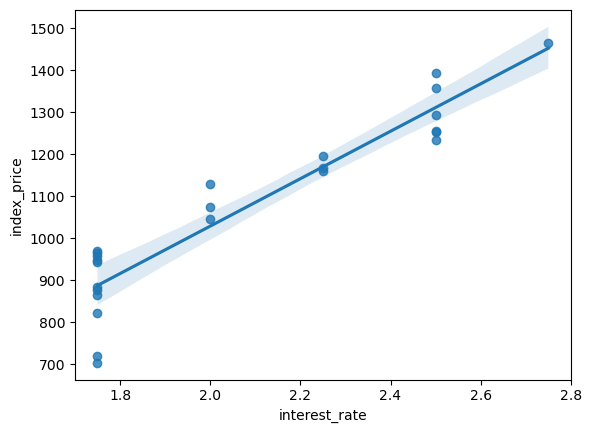

In [28]:
sns.regplot(x = df_index['interest_rate'], y = df_index['index_price'])
plt.show()

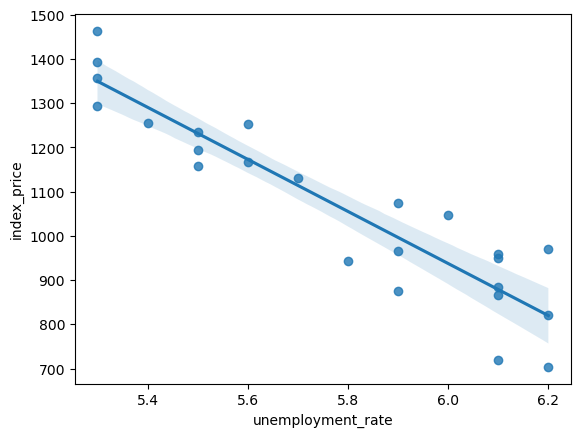

In [30]:
sns.regplot(x = df_index['unemployment_rate'], y = df_index['index_price'])
plt.show()

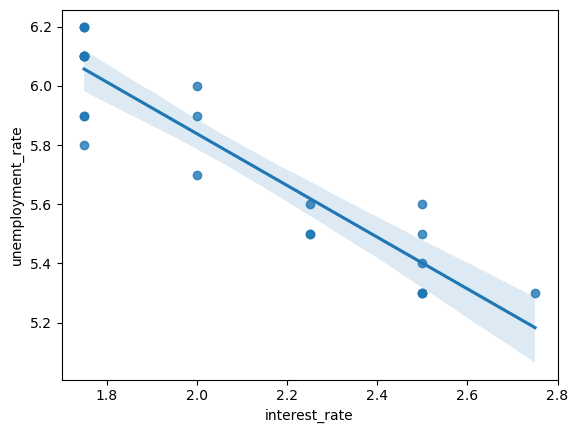

In [31]:
sns.regplot(x = df_index['interest_rate'], y = df_index['unemployment_rate'])
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [40]:
from sklearn.model_selection import cross_val_score
val = cross_val_score(regression,X_train,y_train, scoring = 'neg_mean_squared_error', cv=3)
np.mean(val)

np.float64(-5914.828180162388)

In [41]:
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [46]:
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

In [47]:

adjusted_r2 = adjusted_r2_score(y_test, y_pred, X.shape[1])
print(f"Adjusted R²: {adjusted_r2}")

Adjusted R²: 0.5985619231683761


Assumptions

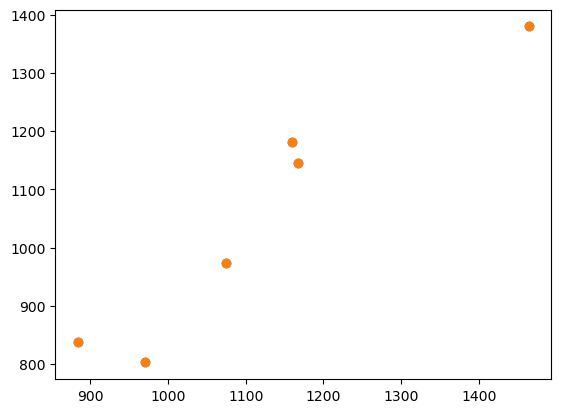

In [49]:
plt.scatter(y_test,y_pred)
plt.show()

In [50]:
residuals = y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


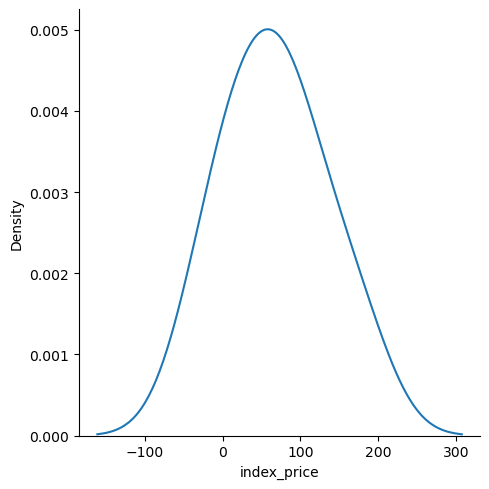

In [51]:
sns.displot(residuals, kind = 'kde')
plt.show()

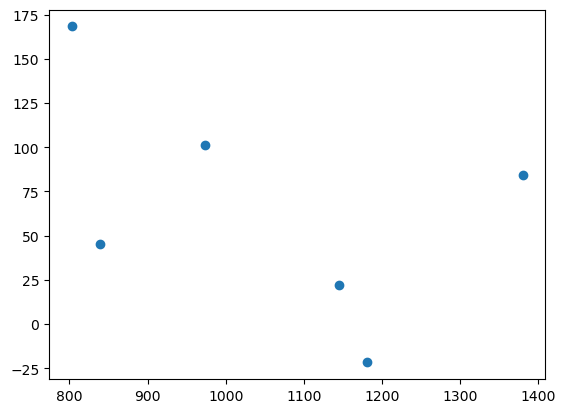

In [53]:
#scatter plot wrt to predictions and residuals
plt.scatter(y_pred,residuals)
plt.show()
#as u can see data is uniformly distributed

In [54]:
##OLS
import statsmodels.api as sm

In [55]:
model = sm.OLS(y_train,X_train).fit()
pred = model.predict(X_test)
print(pred)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [56]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 15 Aug 2025   Prob (F-statistic):                       0.754
Time:                        19:18:50   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Ak\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
